In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(42)

from scipy.stats import norm, ttest_ind

import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('default of credit card clients.xls', skiprows=range(1))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# DATA WRANGLING

In [3]:
cols = np.transpose(df.columns.tolist())
cols

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'], dtype='<U26')

In [4]:
idx = 0
while idx<np.shape(df)[1]:
    df[df.columns[idx]].isna().value_counts()
    idx += 1

In [5]:
idx = 0
while idx<np.shape(df)[1]:
    print(df[df.columns[idx]].isnull().value_counts())
    idx += 1

False    30000
Name: ID, dtype: int64
False    30000
Name: LIMIT_BAL, dtype: int64
False    30000
Name: SEX, dtype: int64
False    30000
Name: EDUCATION, dtype: int64
False    30000
Name: MARRIAGE, dtype: int64
False    30000
Name: AGE, dtype: int64
False    30000
Name: PAY_0, dtype: int64
False    30000
Name: PAY_2, dtype: int64
False    30000
Name: PAY_3, dtype: int64
False    30000
Name: PAY_4, dtype: int64
False    30000
Name: PAY_5, dtype: int64
False    30000
Name: PAY_6, dtype: int64
False    30000
Name: BILL_AMT1, dtype: int64
False    30000
Name: BILL_AMT2, dtype: int64
False    30000
Name: BILL_AMT3, dtype: int64
False    30000
Name: BILL_AMT4, dtype: int64
False    30000
Name: BILL_AMT5, dtype: int64
False    30000
Name: BILL_AMT6, dtype: int64
False    30000
Name: PAY_AMT1, dtype: int64
False    30000
Name: PAY_AMT2, dtype: int64
False    30000
Name: PAY_AMT3, dtype: int64
False    30000
Name: PAY_AMT4, dtype: int64
False    30000
Name: PAY_AMT5, dtype: int64
False    30000

In [7]:
df[cols[13:18]].head(25)

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3102,689,0,0,0
1,1725,2682,3272,3455,3261
2,14027,13559,14331,14948,15549
3,48233,49291,28314,28959,29547
4,5670,35835,20940,19146,19131
5,57069,57608,19394,19619,20024
6,412023,445007,542653,483003,473944
7,380,601,221,-159,567
8,14096,12108,12211,11793,3719
9,0,0,0,13007,13912


In [8]:
cols[12:18]

array(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6'], dtype='<U26')

In [9]:
user = []
for n in range(0, len(df)):
    if (df[cols[12:18]].iloc[n].tolist() == np.zeros(6).tolist()):
        user.append(0)
    else:
        user.append(1)

In [10]:
df["Actual_client"] = user
df["Actual_client"].value_counts()

1    29134
0      866
Name: Actual_client, dtype: int64

In [11]:
df = df[df["Actual_client"]==1]
df.shape

(29134, 26)

In [12]:
df[cols[13:18]].head(25)

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3102,689,0,0,0
1,1725,2682,3272,3455,3261
2,14027,13559,14331,14948,15549
3,48233,49291,28314,28959,29547
4,5670,35835,20940,19146,19131
5,57069,57608,19394,19619,20024
6,412023,445007,542653,483003,473944
7,380,601,221,-159,567
8,14096,12108,12211,11793,3719
9,0,0,0,13007,13912


In [13]:
del df["Actual_client"]

# Feature Engineering

In [14]:
pcols_time = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pcols1 = ['p0', 'p1', 'p2', 'p3', 'p4', 'p5']

In [15]:
def pay_trend_time(df, xcols_in, xcols_out):
    ct = 0
    bry = []
    brn = []
    for c in xcols_out:
        df[c] = df[xcols_in[ct]].apply(lambda x: 1 if x<=0 else 0)
        bry.append(np.array(df[c].value_counts().values[0])/len(df))
        brn.append(np.array(df[c].value_counts().values[1])/len(df))
        ct += 1
    return bry, brn

In [16]:
[bry, brn] = pay_trend_time(df, pcols_time, pcols1)
bry

[0.7845472643646598,
 0.8476693897164824,
 0.8553923251184183,
 0.8795222077298003,
 0.8981259010091303,
 0.8943159195441752]

In [17]:
brn

[0.21545273563534015,
 0.15233061028351755,
 0.14460767488158166,
 0.12047779227019977,
 0.10187409899086977,
 0.10568408045582481]

In [18]:
m = ['MAY', 'JUNE', 'JULY', 'AUG', 'SEPT', 'OCT']
m

['MAY', 'JUNE', 'JULY', 'AUG', 'SEPT', 'OCT']

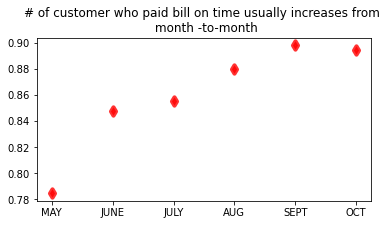

In [19]:
plt.figure(figsize=(6,3))
plt.scatter(m, bry, alpha=0.8, color="red", marker="d", linewidths=4)
#plt.scatter(m, brn, alpha=0.8, color="red", marker="d", linewidths=4)
plt.title("# of customer who paid bill on time usually increases from \n month -to-month")
plt.show()

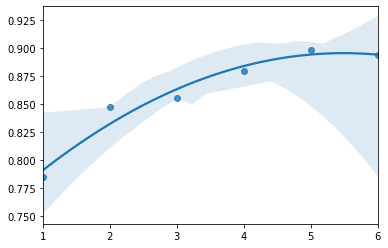

In [20]:
sns.regplot([1,2,3,4,5,6],bry, order=2)
plt.show()

In [21]:
df[cols[13:24]].head()

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [22]:
bcols_amount = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pcols_amount = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
bcols1 = ['b0', 'b1', 'b2', 'b3', 'b4', 'b5']

In [23]:
bb = []
n = 0
for c in pcols_amount: 
    for ct in range(0, len(df)):
        if (df[c].iloc[ct]>=df[bcols_amount[n]].iloc[ct]):
            x = 1
        else:
            x = 0
        bb.append(x)
    n += 1

In [24]:
bb1 = np.transpose(np.reshape(bb, (6, len(df))))
bb1.shape

(29134, 6)

In [25]:
n = 0
for c in bcols1:
    df[c] = bb1[:, n]
    n += 1

In [26]:
cols = np.transpose(df.columns.tolist())
cols

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month', 'p0', 'p1', 'p2', 'p3',
       'p4', 'p5', 'b0', 'b1', 'b2', 'b3', 'b4', 'b5'], dtype='<U26')

In [27]:
y = df['default payment next month'].values

In [28]:
del df['default payment next month']
df['default payment next month'] = y

In [29]:
cols = np.transpose(df.columns.tolist())
cols

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'b0', 'b1', 'b2',
       'b3', 'b4', 'b5', 'default payment next month'], dtype='<U26')

In [30]:
df[bcols1].head(10)

,b0,b1,b2,b3,b4,b5
0,0,0,0,1,1,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,1,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,1,0,1,1,1
8,0,0,0,0,0,0
9,1,1,1,1,0,0


In [31]:
df[bcols_amount+pcols_amount].head(10)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
5,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800
6,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
7,11876,380,601,221,-159,567,380,601,0,581,1687,1542
8,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000
9,0,0,0,0,13007,13912,0,0,0,13007,1122,0


In [32]:
bay = []
for c in bcols1:
    x = df[c].value_counts().values[1]/30000
    bay.append(x)
    print(x)

0.18676666666666666
0.20553333333333335
0.20963333333333334
0.2116
0.22846666666666668
0.2505


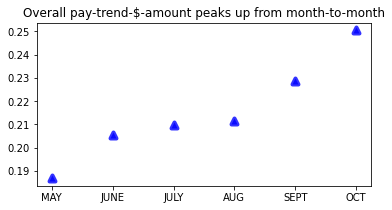

In [33]:
plt.figure(figsize=(6,3))
plt.scatter(m, bay, alpha=0.8, color="blue", marker="^", linewidths=4)
plt.title("Overall pay-trend-$-amount peaks up from month-to-month")
plt.show()

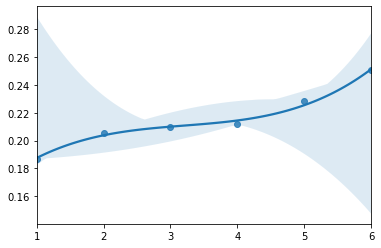

In [34]:
sns.regplot(np.arange(1,7), bay, order=3)
plt.show()

In [35]:
df[["LIMIT_BAL"]+pcols1+bcols1].head(10)

,LIMIT_BAL,p0,p1,p2,p3,p4,p5,b0,b1,b2,b3,b4,b5
0,20000,0,0,1,1,1,1,0,0,0,1,1,1
1,120000,1,0,1,1,1,0,0,0,0,0,0,0
2,90000,1,1,1,1,1,1,0,0,0,0,0,0
3,50000,1,1,1,1,1,1,0,0,0,0,0,0
4,50000,1,1,1,1,1,1,0,1,0,0,0,0
5,50000,1,1,1,1,1,1,0,0,0,0,0,0
6,500000,1,1,1,1,1,1,0,0,0,0,0,0
7,100000,1,1,1,1,1,1,0,1,0,1,1,1
8,140000,1,1,0,1,1,1,0,0,0,0,0,0
9,20000,1,1,1,1,1,1,1,1,1,1,0,0


In [36]:
Ccols1 = ['ta0', 'ta1', 'ta2', 'ta3', 'ta4', 'ta5']
pcols1, bcols1

(['p0', 'p1', 'p2', 'p3', 'p4', 'p5'], ['b0', 'b1', 'b2', 'b3', 'b4', 'b5'])

In [37]:
pbc = []
n = 0
for c in pcols1:
    for ct in range(0,len(df)):
        if (df[c].iloc[ct]==1 and df[bcols1[n]].iloc[ct]==1):
            x = 1
        else:
            x = 0
        #print(ct, '\t', x)
        pbc.append(x)
    n += 1

In [38]:
pbc1 = np.transpose(np.reshape(pbc, (6,len(df))))
np.shape(pbc1)

(29134, 6)

In [39]:
pbc1[0:30,0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0])

In [40]:
n = 0
for c in Ccols1:
    df[c] = pbc1[:,n]
    n += 1

In [41]:
df[pcols1+bcols1+Ccols1].head(12)

,p0,p1,p2,p3,p4,p5,b0,b1,b2,b3,b4,b5,ta0,ta1,ta2,ta3,ta4,ta5
0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1
1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0
5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1
8,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0


In [42]:
df["ta0"].value_counts().values[1]/len(df)

0.14580902038854945

In [43]:
prcom = []
for c in Ccols1:
    x = df[c].value_counts().values[1]/len(df)
    #y = df[c].value_counts().index[1]
    prcom.append(x)
    print(x)

0.14580902038854945
0.1998352440447587
0.2028900940481911
0.20975492551657857
0.22980023340426992
0.2518363424177936


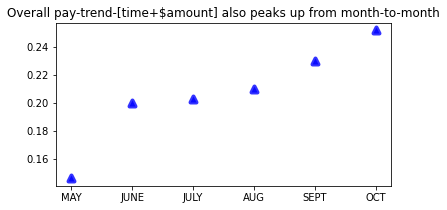

In [44]:
plt.figure(figsize=(6,3))
plt.scatter(m, prcom, alpha=0.8, color="blue", marker="^", linewidths=4)
plt.title("Overall pay-trend-[time+$amount] also peaks up from month-to-month")
plt.show()

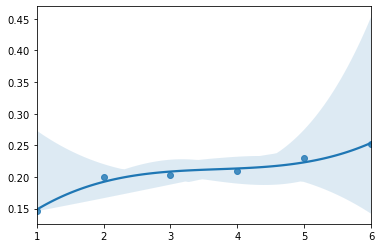

In [45]:
sns.regplot(np.arange(1,7), prcom, order=3)
plt.show()

## Clients who never missed a payment and always paid bill amount or more than that 

In [46]:
def ret_out(l):
    for x in l:
        if x==0:
            return 0
    return 1

In [47]:
ret_out([1,1,0,1,1,1])

0

In [48]:
ret_out([1,1,1,1,1,1])

1

In [49]:
sc = []
for ct in range(0,len(df)):
    x = np.transpose(df[Ccols1].iloc[ct].tolist()).tolist()
    sc1 = ret_out(x)
    sc.append(sc1)

In [50]:
df["SC"] = sc

In [51]:
df["SC"].value_counts()*100/len(df)

0    99.145328
1     0.854672
Name: SC, dtype: float64

### Less than 1% clients always paid bills on-time, never missed a payment: 

In [52]:
cols = np.transpose(df.columns.tolist())
cols

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'b0', 'b1', 'b2',
       'b3', 'b4', 'b5', 'default payment next month', 'ta0', 'ta1',
       'ta2', 'ta3', 'ta4', 'ta5', 'SC'], dtype='<U26')

In [53]:
y = df['default payment next month'].values
del df['default payment next month']

In [54]:
df['default payment next month'] = y

In [55]:
#df.to_csv("default_of_credit_card_client_processed.csv")